# import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

<ul>
     <li>Data Cleaning</li>
     <li>EDA</li>
     <li>Text Preprocessng</li>
     <li>Model Buliding</li>
     <li>Evaluation</li>
     <li>Imporvement</li>
     <li>Website Deploy</li>
</ul>

# 1) Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop the Last 3 Columns

df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
# Change the Column Name

df.rename(columns={"v1": "Target", "v2": "SMS"}, inplace=True)

In [9]:
df.sample(10)

,Target,SMS
1614,ham,Me sef dey laugh you. Meanwhile how's my darli...
697,ham,meet you in corporation st outside gap Û_ you...
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit..."
3099,ham,Tessy..pls do me a favor. Pls convey my birthd...
447,ham,I wont get concentration dear you know you are...
4875,spam,lyricalladie(21/F) is inviting you to be her f...
1948,ham,I cant pick the phone right now. Pls send a me...
1665,ham,Dunno cos i was v late n when i reach they ins...
5024,ham,I was gonna ask you lol but i think its at 7
3274,ham,Hurry home u big butt. Hang up on your last ca...


In [10]:
# Encode the Output Value into 0 and  1

from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
encode = en.fit_transform(df["Target"])
df["Target"] = encode

In [11]:
df.head(4)

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [12]:
# Missing Values

df.isnull().sum()

Target    0
SMS       0
dtype: int64

In [13]:
# Find the Dublicate Values

df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep="first", inplace=True)

In [15]:
df.shape

(5169, 2)

# 2) EDA

In [16]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

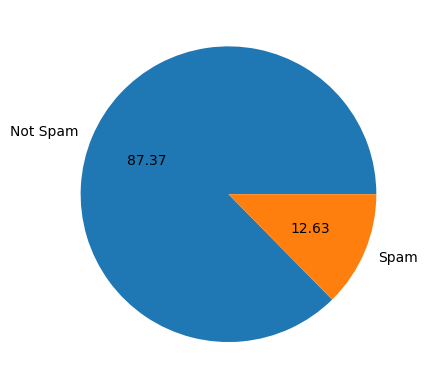

In [17]:
plt.pie(df["Target"].value_counts(), autopct="%0.2f", labels=["Not Spam", "Spam"])
plt.show()

### Data is Imbalced

In [18]:
import nltk

In [19]:
df["Characters"] = df["SMS"].str.len()

In [20]:
df["Words"] = df["SMS"].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df

,Target,SMS,Characters,Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [22]:
df["Sentence"] = df["SMS"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df

,Target,SMS,Characters,Words,Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
df[["Characters", "Words", "Sentence"]].describe()

,Characters,Words,Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# Ham Mesaage Describe

df[df["Target"] == 0][["Characters", "Words", "Sentence"]].describe()

,Characters,Words,Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Spam Message

df[df["Target"] == 1][["Characters", "Words", "Sentence"]].describe()

,Characters,Words,Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Characters', ylabel='Count'>

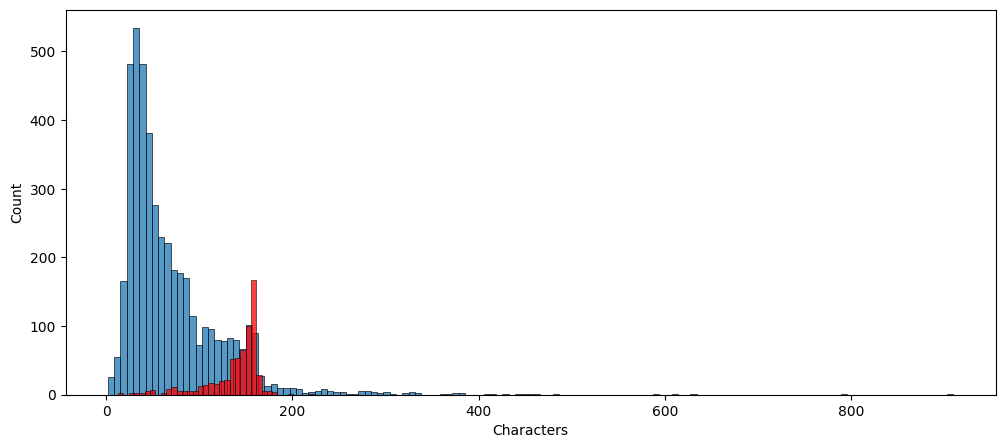

In [27]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df["Target"] == 0]["Characters"])
sns.histplot(df[df["Target"] == 1]["Characters"], color="red")

<Axes: xlabel='Words', ylabel='Count'>

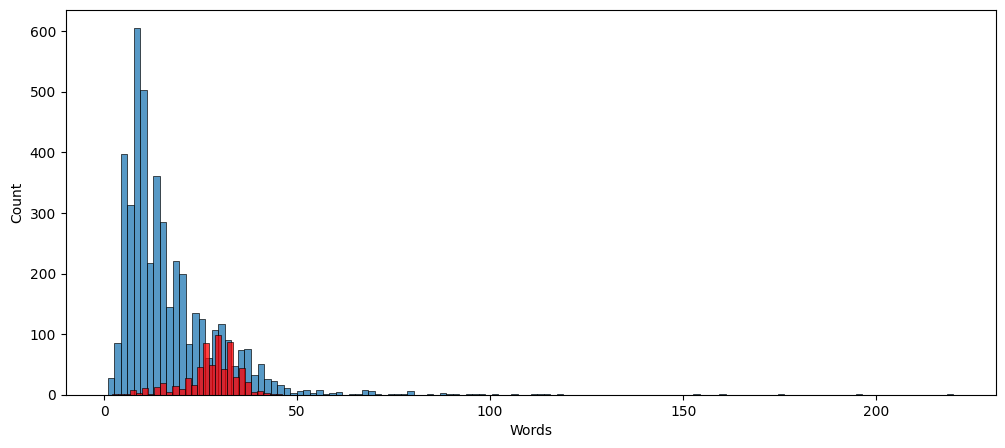

In [28]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df["Target"] == 0]["Words"])
sns.histplot(df[df["Target"] == 1]["Words"], color="red")

<Axes: xlabel='Sentence', ylabel='Count'>

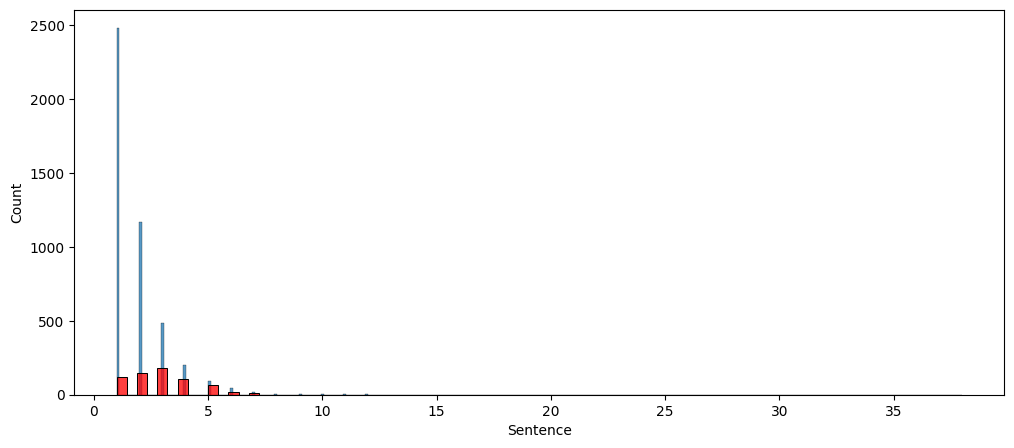

In [29]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df["Target"] == 0]["Sentence"])
sns.histplot(df[df["Target"] == 1]["Sentence"], color="red")

### Check the Correation of Each Other

<Axes: >

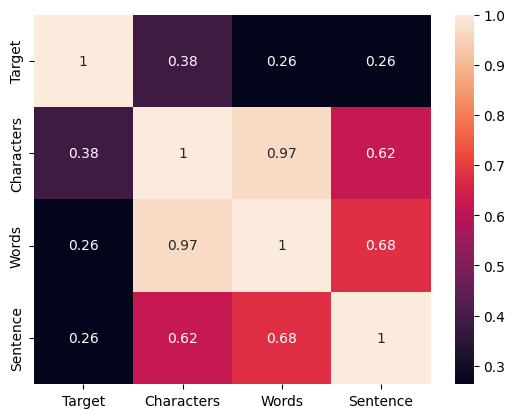

In [30]:
sns.heatmap(df[["Target", "Characters", "Words", "Sentence"]].corr(), annot=True)

Here we can use only one column (Characters ,Words , Sentences ) Beacase that all Columns are Highly Correalted

So Here We use the Taget - Characters Beacase they are less correalted

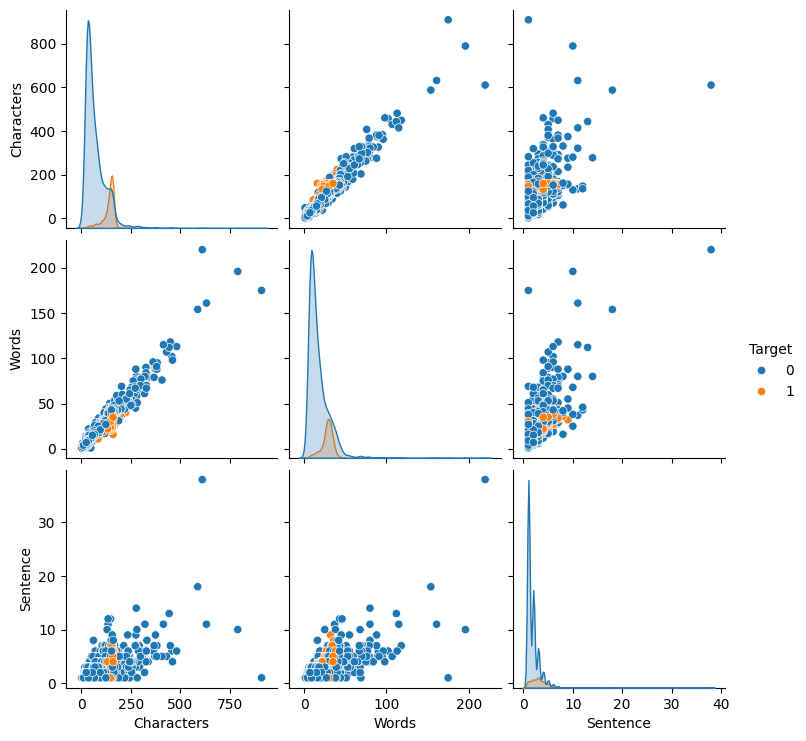

In [31]:
# plt.figure(figsize=(12,12))
sns.pairplot(df, hue="Target")

# Data Pre-Processing

<ul>
     <li></li>
</ul>

<ul>
     <li>Lower Case</li>
     <li>Tokenization</li>
     <li>Removing special characters</li>
     <li>Removing stop words and panctuation</li>
     <li>Stemming</li>
</ul>

In [32]:
from nltk.stem.porter import PorterStemmer
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
ps = PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [33]:
def Remove_specical_char(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    stop_words = set(stopwords.words("english"))
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [34]:
df["SMS Transform"] = df["SMS"].apply(Remove_specical_char)

In [35]:
df

,Target,SMS,Characters,Words,Sentence,SMS Transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [36]:
# import nltk
# nltk.download('stopwords')

In [37]:
df["SMS"][200]

'I sent you  &lt;#&gt;  bucks'

In [38]:
df["SMS Transform"][200]

'sent lt gt buck'

In [39]:
df

,Target,SMS,Characters,Words,Sentence,SMS Transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


### Create the Word Cloud



In [40]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords=set(STOPWORDS), width=1000, height=700)

In [41]:
ham_SMS = df[df["Target"] == 0]["SMS Transform"].str.cat(sep=" ")
ham_SMS

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun gon na home soon want talk stuff anymor tonight k cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh k watch eh u rememb 2 spell name ye v naughti make v wet fine thatåõ way u feel thatåõ way gota b serious spell name go tri 2 month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait sti

In [42]:
ham_wc = wc.generate(ham_SMS)

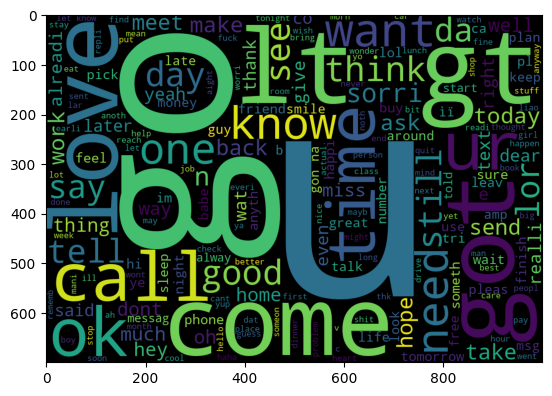

In [43]:
plt.imshow(ham_wc)

In [44]:
spam_SMS = df[df["Target"] == 1]["SMS Transform"].str.cat(sep=" ")
spam_SMS

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [45]:
spam_SMS_wc = wc.generate(spam_SMS)

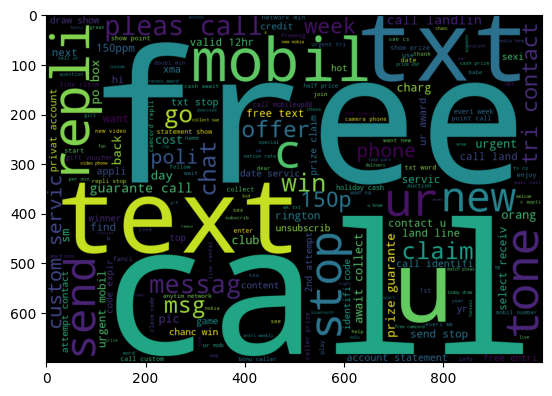

In [46]:
plt.imshow(ham_wc)

In [47]:
df[df["Target"] == 1]["SMS Transform"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [48]:
spam_word = []
for mes in df[df["Target"] == 1]["SMS Transform"].tolist():
    for word in mes.split():
        spam_word.append(word)

In [49]:
len(spam_word)

9939

In [50]:
from collections import Counter

Counter(spam_word).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [51]:
pd.DataFrame(Counter(spam_word).most_common(30)).head(10)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


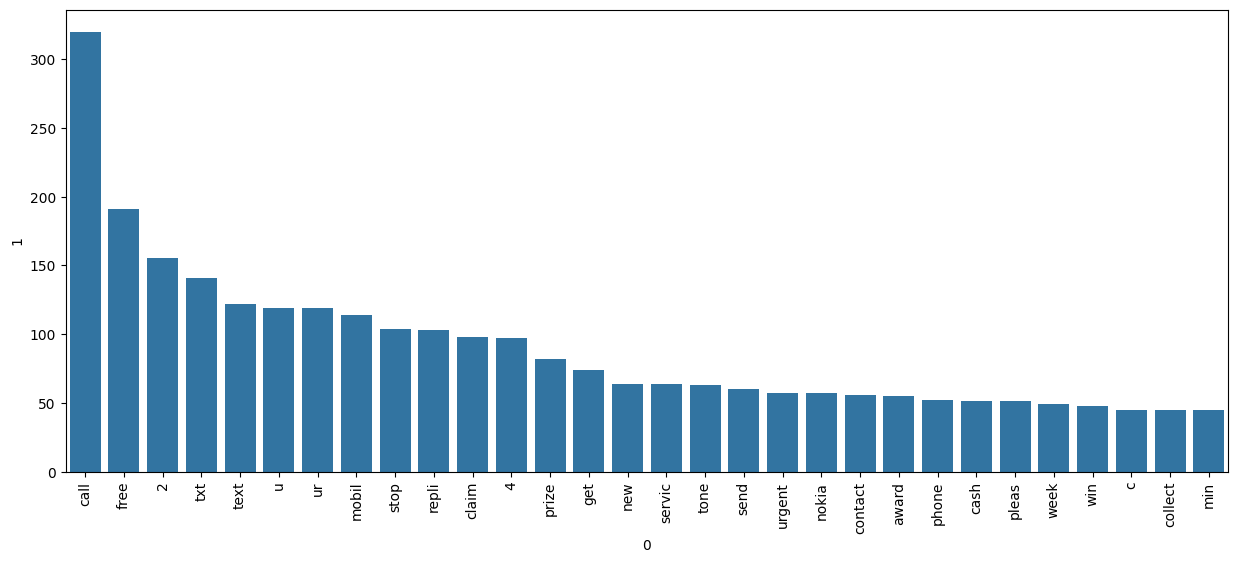

In [52]:
plt.figure(figsize=(15, 6))
sns.barplot(
    x=pd.DataFrame(Counter(spam_word).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_word).most_common(30))[1],
)
plt.xticks(rotation="vertical")
plt.show()

# 4) Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

In [54]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["SMS Transform"]).toarray()

In [55]:
from sklearn.preprocessing import MinMaxScaler
mxs = MinMaxScaler()
x = mxs.fit_transform(x)

In [56]:
x.shape

(5169, 6708)

In [57]:
y = df["Target"].values

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=2, test_size=0.20
)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
y_pred1

array([0, 1, 1, ..., 1, 0, 0])

In [62]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[786 110]
 [ 18 120]]
0.5217391304347826


In [63]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9690522243713733
[[876  20]
 [ 12 126]]
0.863013698630137


In [65]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid',gamma=0.1)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=4)
lgc = LogisticRegression(solver='liblinear',penalty='l1')
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=4)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
     'SVC':svc,
     'knn':knn,
     'dtc':dtc,
     'lgc':lgc,
     'mnb':mnb,
     'rfc':rfc,
     'bv':bc,
     'abv':abc,
     'etc':etc,
     'gbc':gbc,
     'xgb':xgb
} 

In [70]:
from sklearn.metrics import precision_score,accuracy_score
def Train_Model(clf,x_train,y_train,x_test,y_test):
     clf.fit(x_train,y_train)
     y_pred = clf.predict(x_test)
     acc = accuracy_score(y_test,y_pred)
     ps = precision_score(y_test,y_pred)
     return acc , ps

In [71]:
# accuracy_score(y_test,y_pred)

In [72]:
# Train_Model(svc,x_train,y_train,x_test,y_test)

In [73]:
clfs.items()

dict_items([('SVC', SVC(gamma=0.1, kernel='sigmoid')), ('knn', KNeighborsClassifier()), ('dtc', DecisionTreeClassifier(max_depth=4)), ('lgc', LogisticRegression(penalty='l1', solver='liblinear')), ('mnb', MultinomialNB()), ('rfc', RandomForestClassifier(n_estimators=50, random_state=2)), ('bv', BaggingClassifier(n_estimators=50, random_state=4)), ('abv', AdaBoostClassifier(random_state=2)), ('etc', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('gbc', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_

In [74]:
acc_score = []
pre_score = []
for key,value in clfs.items():
     current_acc,current_ps = Train_Model(value,x_train,y_train,x_test,y_test)

     print("name:",key)
     print('ac:',current_acc)
     print('ps :',current_ps)

     acc_score.append(current_acc)
     pre_score.append(current_ps)
     
     

name: SVC
ac: 0.9661508704061895
ps : 0.9813084112149533
name: knn
ac: 0.8965183752417795
ps : 1.0
name: dtc
ac: 0.9294003868471954
ps : 0.8282828282828283
name: lgc
ac: 0.9661508704061895
ps : 0.9478260869565217
name: mnb
ac: 0.9690522243713733
ps : 0.863013698630137
name: rfc
ac: 0.971953578336557
ps : 1.0
name: bv
ac: 0.9555125725338491
ps : 0.8538461538461538


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


name: abv
ac: 0.9613152804642167
ps : 0.9454545454545454
name: etc
ac: 0.9729206963249516
ps : 0.9824561403508771
name: gbc
ac: 0.9526112185686654
ps : 0.9238095238095239
name: xgb
ac: 0.9729206963249516
ps : 0.9435483870967742


In [75]:
acc_score

[0.9661508704061895,
 0.8965183752417795,
 0.9294003868471954,
 0.9661508704061895,
 0.9690522243713733,
 0.971953578336557,
 0.9555125725338491,
 0.9613152804642167,
 0.9729206963249516,
 0.9526112185686654,
 0.9729206963249516]

In [76]:
pre_score

[0.9813084112149533,
 1.0,
 0.8282828282828283,
 0.9478260869565217,
 0.863013698630137,
 1.0,
 0.8538461538461538,
 0.9454545454545454,
 0.9824561403508771,
 0.9238095238095239,
 0.9435483870967742]

In [77]:
model_df = pd.DataFrame({'Algoritham':clfs.keys(),'Accuracy Score':acc_score,'Precision Score':pre_score}).sort_values('Precision Score',ascending=False)
model_df

,Algoritham,Accuracy Score,Precision Score
1,knn,0.896518,1.000000
5,rfc,0.971954,1.000000
8,etc,0.972921,0.982456
0,SVC,0.966151,0.981308
3,lgc,0.966151,0.947826
7,abv,0.961315,0.945455
10,xgb,0.972921,0.943548
9,gbc,0.952611,0.923810
4,mnb,0.969052,0.863014
6,bv,0.955513,0.853846


In [78]:
model_vis = pd.melt(model_df, id_vars = "Algoritham")

In [79]:
model_vis

,Algoritham,variable,value
0,knn,Accuracy Score,0.896518
1,rfc,Accuracy Score,0.971954
2,etc,Accuracy Score,0.972921
3,SVC,Accuracy Score,0.966151
4,lgc,Accuracy Score,0.966151
5,abv,Accuracy Score,0.961315
6,xgb,Accuracy Score,0.972921
7,gbc,Accuracy Score,0.952611
8,mnb,Accuracy Score,0.969052
9,bv,Accuracy Score,0.955513


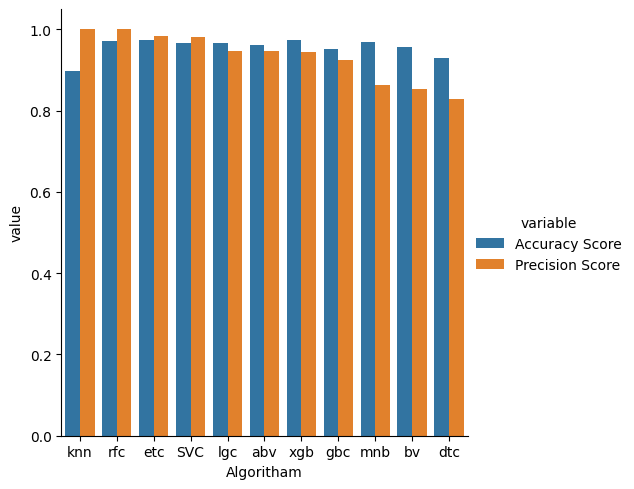

In [80]:

sns.catplot(x='Algoritham',y='value',hue='variable',data=model_vis,kind='bar')

In [81]:
temp_df =  pd.DataFrame({'Algoritham':clfs.keys(),'Accuracy Score Scale':acc_score,'Precision Score Scale':pre_score}).sort_values('Precision Score Scale',ascending=False)


In [82]:
new_df_scaled = temp_df.merge(temp_df,on='Algorithm')

KeyError: 'Algorithm'